In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [5]:
df=df.drop(['Surname','RowNumber','CustomerId'],axis=1) # droping the unique columns

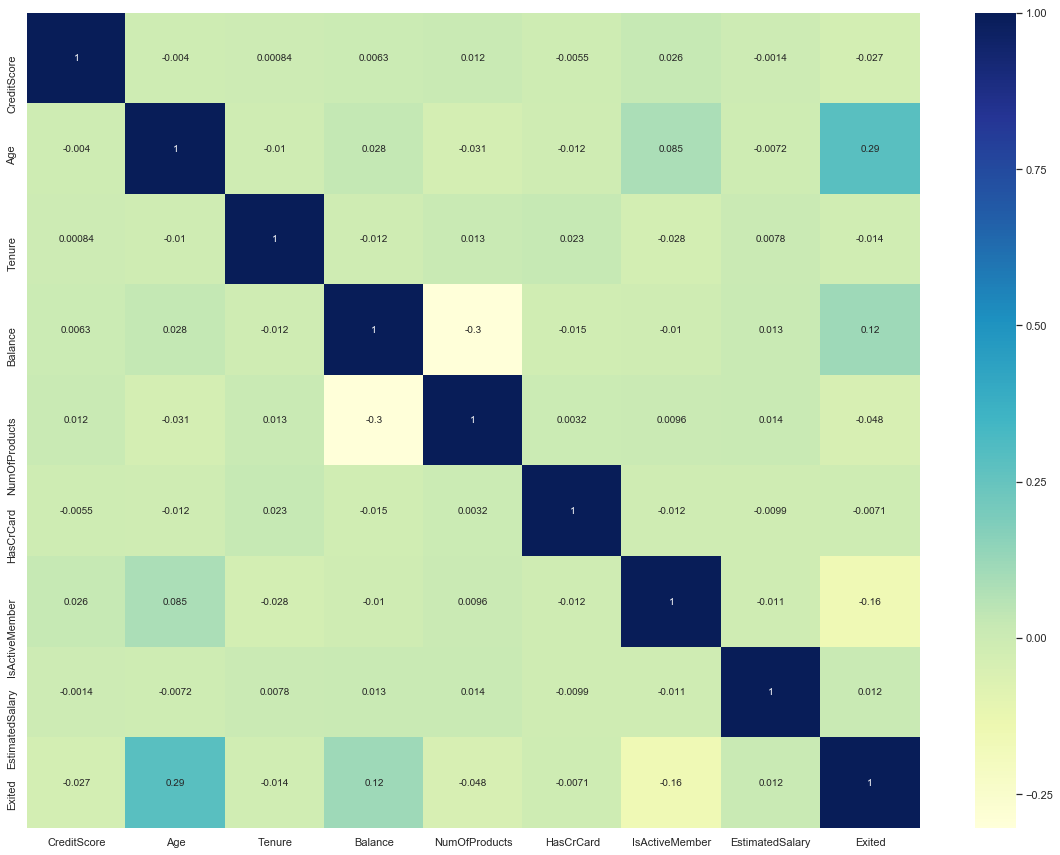

In [6]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True, annot_kws={"size": 10},cmap="YlGnBu")
#correlation between the features, we can see Age and Balance have high infulence on the target variable Exited

In [7]:
df.var()

CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [8]:
one_hot = pd.get_dummies(df['Geography'])
df = df.drop('Geography',axis = 1)
df = df.join(one_hot)  #one hot encoding the string values in df

In [9]:
one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender',axis = 1)
df = df.join(one_hot)

In [10]:
df.describe(include='all')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


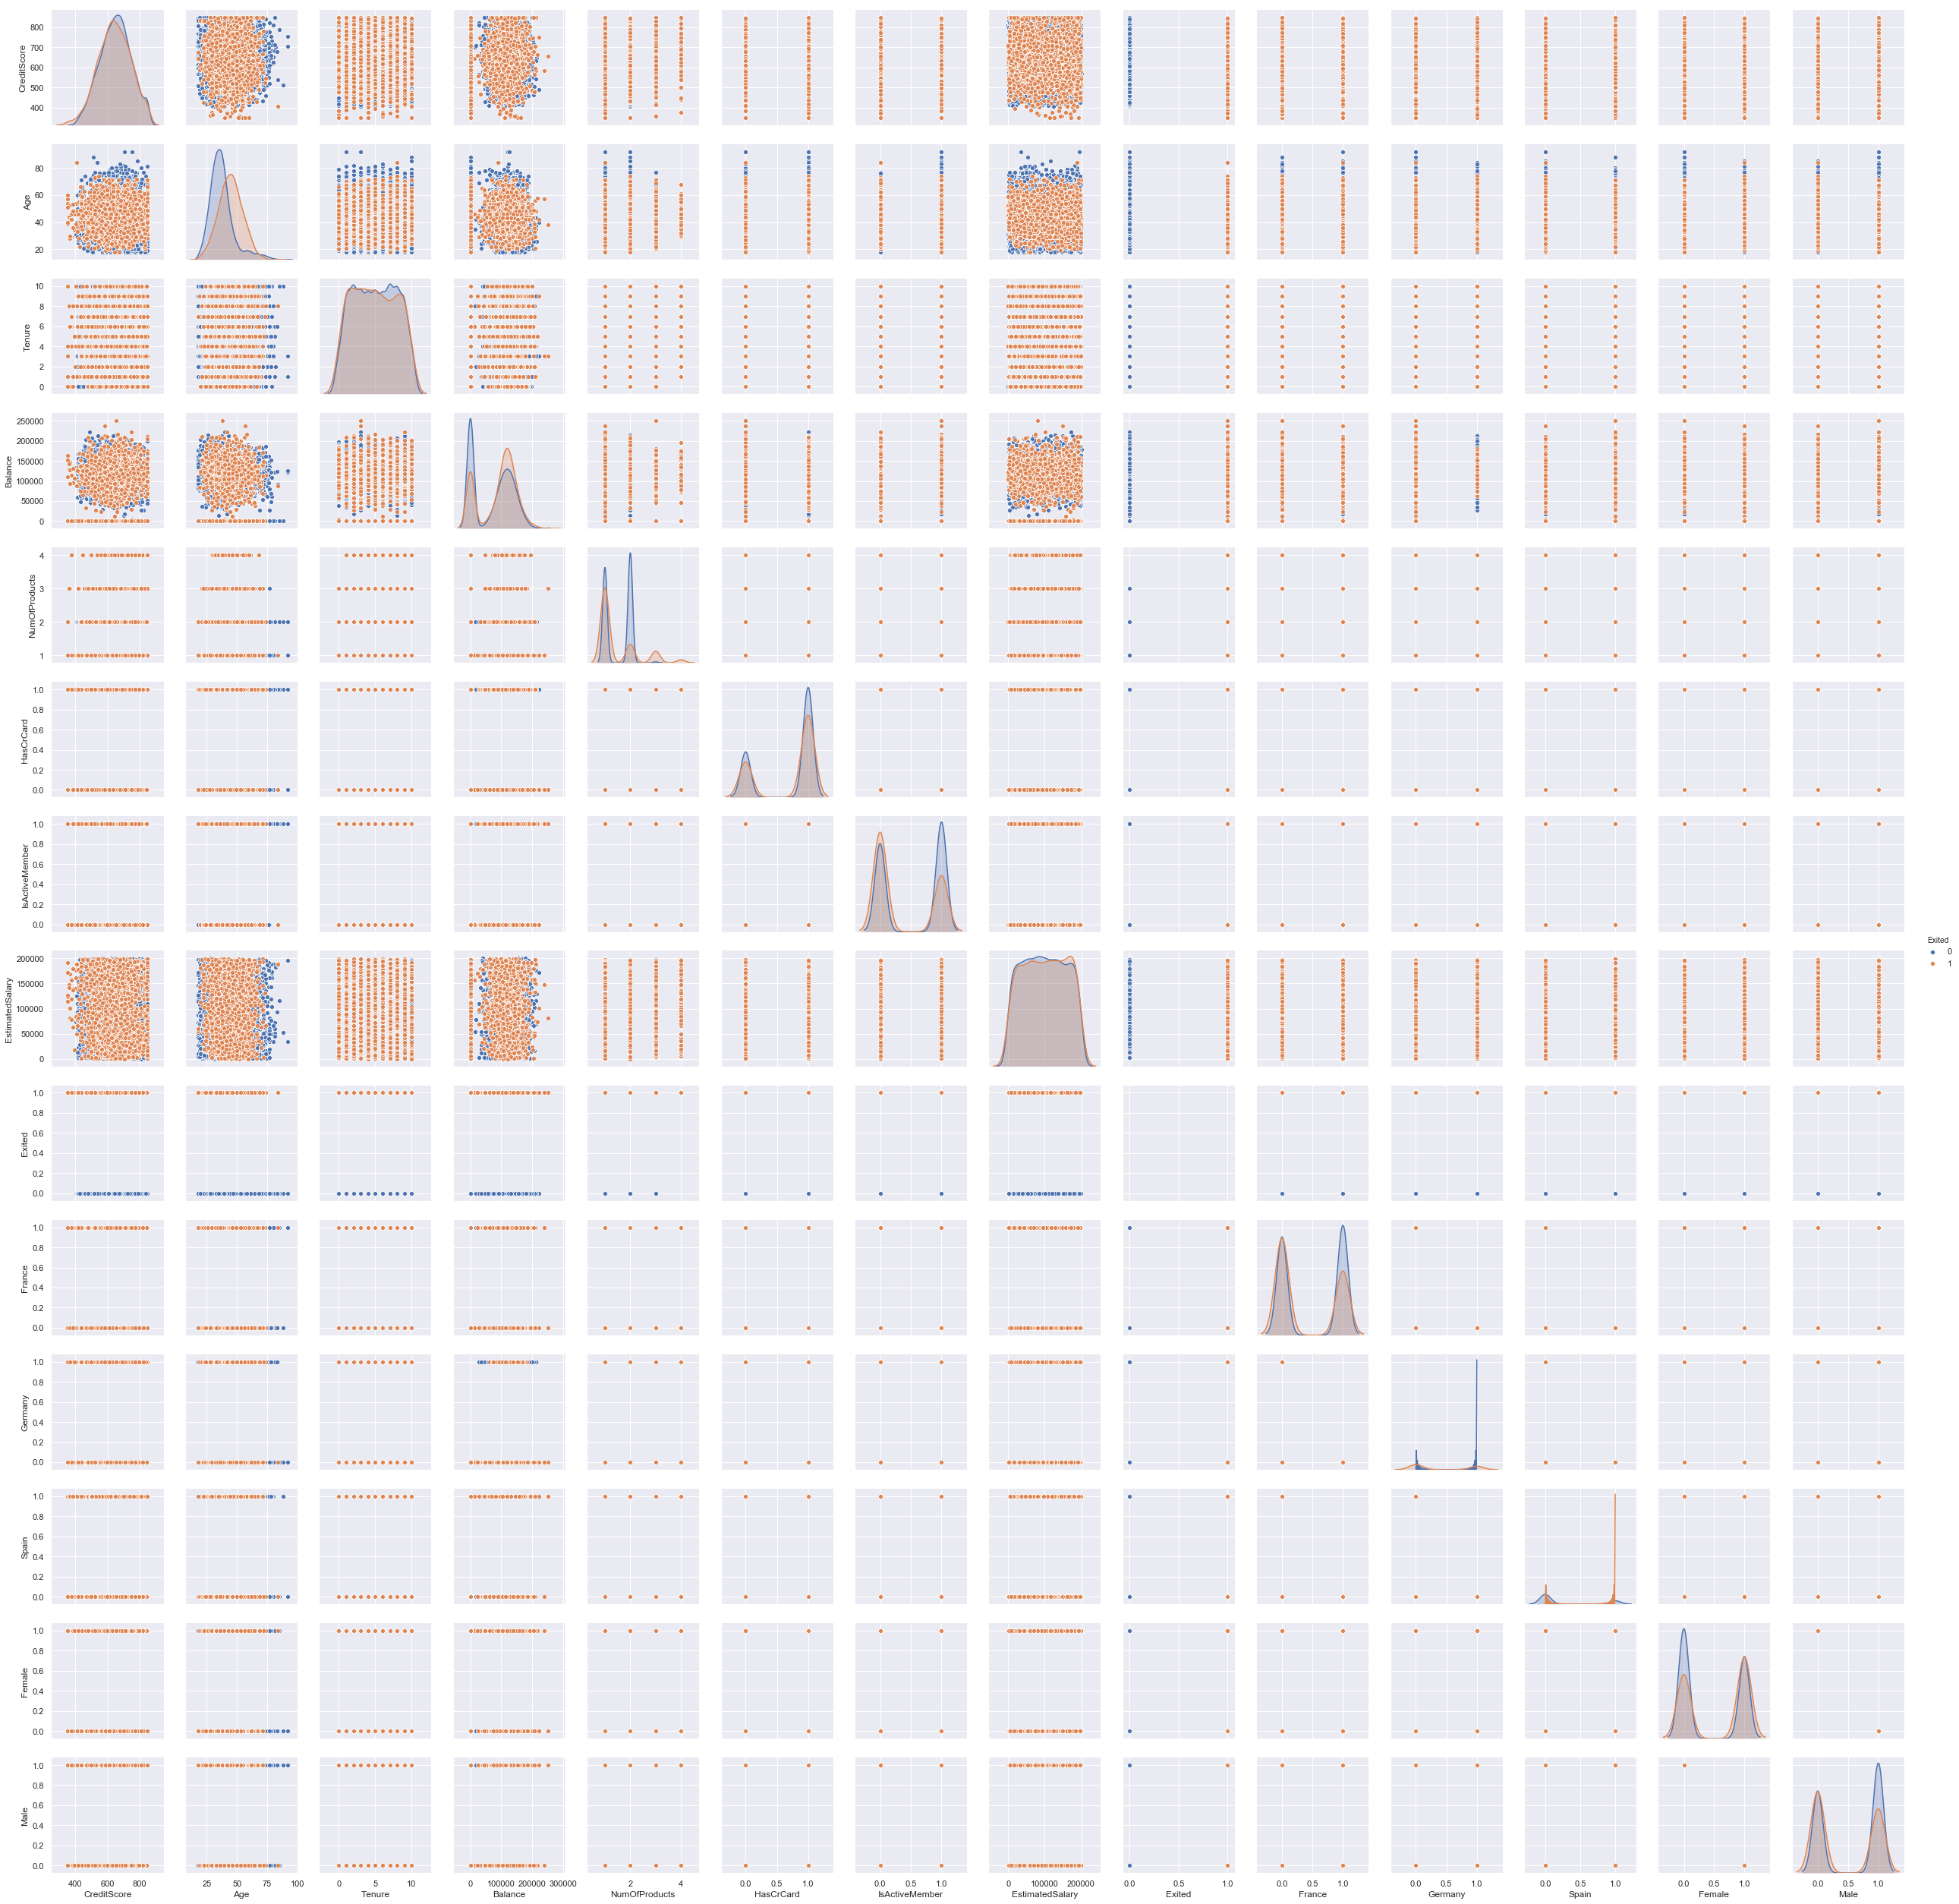

In [11]:
sns.pairplot(df,hue="Exited") #we can see the classes are overlapping in almost all the features, hence predicting the classes will be hard

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [13]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
poly = PolynomialFeatures(degree =2, include_bias=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30) # test train split

In [16]:
X_scaled = preprocessing.scale(X_train)
X_scaled = pd.DataFrame(X_scaled, columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain','Female', 'Male'])
X_poly = poly.fit_transform(X_scaled)
X_train = pd.DataFrame(X_poly,columns=[poly.get_feature_names(X_scaled.columns)])
#Scaling train and test set seperatly and updating the columns with polynomial features with degree 2
x_scaled = preprocessing.scale(X_test)
x_scaled = pd.DataFrame(x_scaled, columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain','Female', 'Male'])
x_poly = poly.fit_transform(x_scaled)
X_test = pd.DataFrame(x_poly,columns=[poly.get_feature_names(x_scaled.columns)])

In [17]:
from imblearn.over_sampling import SMOTE # oversampling the train data for minority class with ratio 0.4
X_train, y_train= SMOTE(ratio=0.4).fit_resample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
mod=lasso.fit(X_train,y_train) #choosing Lasso model to get the features with information

In [19]:
X_train=X_train.transpose()[mod.coef_!=0].transpose() #selecting the features obtained from Lasso model in both Train and Test data
X_test =X_test.transpose()[mod.coef_!=0].transpose()

In [20]:
#X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
#y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [21]:
#declaring the NN model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(36, activation='relu'))
model.add(tf.keras.layers.Dense(48, activation='relu'))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [22]:
#optimised model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'],learning_rate=0.001,batch_size=35)

In [23]:
model.fit(X_train,y_train,epochs=100)

Train on 7824 samples
Epoch 1/100
7824/7824 [==============================] - 1s 115us/sample - loss: 0.6160 - acc: 0.7110
Epoch 2/100
7824/7824 [==============================] - 0s 38us/sample - loss: 0.5440 - acc: 0.7495
Epoch 3/100
7824/7824 [==============================] - 0s 42us/sample - loss: 0.4950 - acc: 0.7823
Epoch 4/100
7824/7824 [==============================] - 0s 40us/sample - loss: 0.4504 - acc: 0.8098
Epoch 5/100
7824/7824 [==============================] - 0s 38us/sample - loss: 0.4268 - acc: 0.8165
Epoch 6/100
7824/7824 [==============================] - 0s 44us/sample - loss: 0.4150 - acc: 0.82290s - loss: 0.4239 - acc: 0
Epoch 7/100
7824/7824 [==============================] - 0s 38us/sample - loss: 0.4076 - acc: 0.8266
Epoch 8/100
7824/7824 [==============================] - 0s 38us/sample - loss: 0.4038 - acc: 0.8258
Epoch 9/100
7824/7824 [==============================] - 0s 41us/sample - loss: 0.4012 - acc: 0.8220
Epoch 10/100
7824/7824 [==================

7824/7824 [==============================] - 0s 40us/sample - loss: 0.3623 - acc: 0.8369
Epoch 79/100
7824/7824 [==============================] - 0s 39us/sample - loss: 0.3611 - acc: 0.83870s - loss: 0.3648 - acc: 0.8
Epoch 80/100
7824/7824 [==============================] - 0s 39us/sample - loss: 0.3611 - acc: 0.8360
Epoch 81/100
7824/7824 [==============================] - 0s 40us/sample - loss: 0.3601 - acc: 0.8400
Epoch 82/100
7824/7824 [==============================] - 0s 40us/sample - loss: 0.3612 - acc: 0.8376
Epoch 83/100
7824/7824 [==============================] - 0s 40us/sample - loss: 0.3611 - acc: 0.83690s - loss: 0.3560 - acc: 0.8
Epoch 84/100
7824/7824 [==============================] - 0s 38us/sample - loss: 0.3609 - acc: 0.8368
Epoch 85/100
7824/7824 [==============================] - 0s 39us/sample - loss: 0.3613 - acc: 0.8377
Epoch 86/100
7824/7824 [==============================] - 0s 39us/sample - loss: 0.3595 - acc: 0.8358
Epoch 87/100
7824/7824 [===============

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  228       
_________________________________________________________________
dense_1 (Dense)              multiple                  312       
_________________________________________________________________
dense_2 (Dense)              multiple                  900       
_________________________________________________________________
dense_3 (Dense)              multiple                  1776      
_________________________________________________________________
dense_4 (Dense)              multiple                  1176      
_________________________________________________________________
dense_5 (Dense)              multiple                  1

In [25]:
from sklearn.metrics import accuracy_score
predicted = np.where(model.predict(X_train)>0.5,1,0)
print("Train data accuracy score= ",accuracy_score(y_train,predicted))
predicted1 = np.where(model.predict(X_test)>0.5,1,0)
print("Test data accuracy score= ",accuracy_score(y_test,predicted1))

Train data accuracy score=  0.8449642126789366
Test data accuracy score=  0.8483333333333334


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, predicted) #train data Confustion matrix

array([[5184,  405],
       [ 808, 1427]], dtype=int64)

In [27]:
confusion_matrix(y_test, predicted1) #test data Confustion matrix

array([[2190,  184],
       [ 271,  355]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_train, predicted)) ## Train set results

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5589
           1       0.78      0.64      0.70      2235

    accuracy                           0.84      7824
   macro avg       0.82      0.78      0.80      7824
weighted avg       0.84      0.84      0.84      7824



In [30]:
print(classification_report(y_test,predicted1)) ## Test set results 

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2374
           1       0.66      0.57      0.61       626

    accuracy                           0.85      3000
   macro avg       0.77      0.74      0.76      3000
weighted avg       0.84      0.85      0.84      3000



In [31]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,predicted1)

0.5159869681707357

In [32]:
##findings 
#The data provided has less data for the desired class (class 1) and hence the model performs well in training and not that effective during test.
#we can see the precision, recall and F1-score has dropped in test for class 1 compared to train data.